In [126]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Preprocess data

In [2]:
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles] 
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

In [17]:
data = pd.read_csv('gk/HIV.csv').dropna()


In [19]:
Canon_SMILES = canonical_smiles(data['smiles'])


[09:56:01] WARNING: not removing hydrogen atom without neighbors
[09:56:01] WARNING: not removing hydrogen atom without neighbors


In [25]:
data

,smiles,activity,HIV_active,features
1,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0.0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
5,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
9,O=S(=O)(O)CCS(=O)(=O)O,CI,0.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
82245,CCC1CCC2c3c([nH]c4ccc(C)cc34)C3C(=O)N(N(C)C)C(...,CI,0.0,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ..."
82247,Cc1ccc2[nH]c3c(c2c1)C1CCC(C(C)(C)C)CC1C1C(=O)N...,CI,0.0,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ..."
82249,Cc1ccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)C...,CI,0.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ..."
82251,Cc1cccc(N2C(=O)C3c4[nH]c5ccccc5c4C4CCC(C(C)(C)...,CI,0.0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ..."


In [23]:
# Chuyển đổi SMILES thành vector đặc điểm
def smiles_to_vector(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [0] * 200
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=200)
    return list(fp)

In [81]:
# Tạo vector đặc điểm từ cột SMILES
data['features'] = data['smiles'].apply(smiles_to_vector)
features_df = pd.DataFrame(np.asarray(data['features']))

[10:14:30] DEPRECATION WARNING: please use MorganGenerator
[10:14:30] DEPRECATION WARNING: please use MorganGenerator
[10:14:30] DEPRECATION WARNING: please use MorganGenerator
[10:14:30] DEPRECATION WARNING: please use MorganGenerator
[10:14:30] DEPRECATION WARNING: please use MorganGenerator
[10:14:30] DEPRECATION WARNING: please use MorganGenerator
[10:14:30] DEPRECATION WARNING: please use MorganGenerator
[10:14:30] DEPRECATION WARNING: please use MorganGenerator
[10:14:30] DEPRECATION WARNING: please use MorganGenerator
[10:14:30] DEPRECATION WARNING: please use MorganGenerator
[10:14:30] DEPRECATION WARNING: please use MorganGenerator
[10:14:30] DEPRECATION WARNING: please use MorganGenerator
[10:14:30] DEPRECATION WARNING: please use MorganGenerator
[10:14:30] DEPRECATION WARNING: please use MorganGenerator
[10:14:30] DEPRECATION WARNING: please use MorganGenerator
[10:14:30] DEPRECATION WARNING: please use MorganGenerator
[10:14:30] DEPRECATION WARNING: please use MorganGenerat

In [84]:
features_dataframe = pd.DataFrame(np.array([i for i in features_df[0]]))

In [85]:
features_dataframe

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41122,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,1,0,0,0,1
41123,1,1,1,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,1
41124,1,1,1,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,1
41125,1,1,1,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,1


In [102]:
data["HIV_active"].reset_index()

,index,HIV_active
0,1,0.0
1,3,0.0
2,5,0.0
3,7,0.0
4,9,0.0
...,...,...
41122,82245,0.0
41123,82247,0.0
41124,82249,0.0
41125,82251,0.0


In [109]:
processed_data = pd.concat([features_dataframe, data["HIV_active"]], axis=1).dropna()

In [111]:
processed_data

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,HIV_active
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41117,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41119,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
41121,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
41123,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [112]:
processed_data.to_csv("HIV_processed.csv", index=False)

# Neural Network

In [113]:
processed_data = pd.read_csv('HIV_processed.csv')

In [114]:
processed_data

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,HIV_active
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20558,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20559,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
20560,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
20561,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [120]:
X = processed_data.drop(['HIV_active'], axis=1).values
y = processed_data['HIV_active'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, 
    y_train, 
    epochs=20, 
    batch_size=32, 
    validation_data=(X_test, y_test), 
    callbacks=[early_stopping]
)

Epoch 1/20


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


515/515 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9611 - loss: 0.1658 - val_accuracy: 0.9660 - val_loss: 0.1628
Epoch 2/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9704 - loss: 0.1391 - val_accuracy: 0.9660 - val_loss: 0.1549
Epoch 3/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9731 - loss: 0.1177 - val_accuracy: 0.9660 - val_loss: 0.1587
Epoch 4/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9726 - loss: 0.1147 - val_accuracy: 0.9660 - val_loss: 0.1643
Epoch 5/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.1033 - val_accuracy: 0.9660 - val_loss: 0.1625


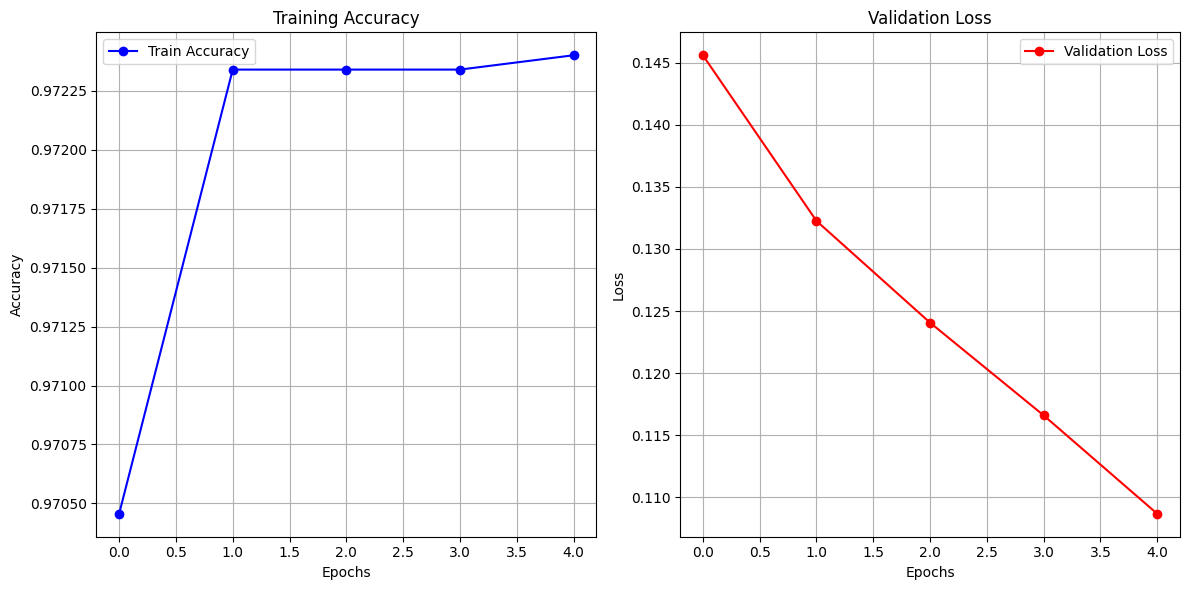

In [130]:
epochs = range(0, 5, 1)
train_acc = [history.history['accuracy'][i] for i in epochs]
val_loss = [history.history['loss'][i] for i in epochs]

plt.figure(figsize=(12, 6))

# Subplot for Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Train Accuracy', marker='o', color='blue')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Subplot for Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', color='red')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Evaluate

In [132]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy on test: {test_accuracy * 100:.2f}%")
nn_accuracy = test_accuracy
print(f"Accuracy of NN model: {nn_accuracy * 100:.2f}%")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.9647 - loss: 0.1599
Accuracy on test: 96.60%
Accuracy of NN model: 96.60%


# PLS & PCA-PLS

In [135]:
data = pd.read_csv('HIV_processed.csv').dropna()
X = data.drop('HIV_active', axis=1)
y = data['HIV_active']


pls = PLSRegression(n_components=5)
pls.fit(X, y)
y_pred_pls = pls.predict(X).round()
pls_accuracy = accuracy_score(y, y_pred_pls)

# Mô hình PCA kết hợp PLS
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
pca_pls = PLSRegression(n_components=5)
pca_pls.fit(X_pca, y)
y_pred_pca_pls = pca_pls.predict(X_pca).round()
pca_pls_accuracy = accuracy_score(y, y_pred_pca_pls)

print(f"Accuracy of PLS model: {pls_accuracy * 100:.2f}%")



Accuracy of PLS model: 97.11%


# Overall

In [136]:
print(f"PLS Accuracy: {pls_accuracy * 100:.2f}%")
print(f"Neural Network Accuracy: {nn_accuracy * 100:.2f}%")
print(f"PCA + PLS Accuracy: {pca_pls_accuracy * 100:.2f}%")


PLS Accuracy: 97.11%
Neural Network Accuracy: 96.60%
PCA + PLS Accuracy: 97.11%
